# Structured Financial Newsfeed : SpaCy and Streamlit 

[https://economictimes.indiatimes.com/rss.cms](https://economictimes.indiatimes.com/rss.cms)

https://spacy.io/architecture-415624fc7d149ec03f2736c4aa8b8f3c.svg

## Natural Language Processing is Named Entity Recognition (NER).

### Extract the trending stocks news data

In [36]:
import requests
resp = requests.get("https://economictimes.indiatimes.com/markets/rssfeeds/1977021501.cms")


In [37]:
resp

<Response [200]>

Headlines inside a list:



```
/bs4/doc

```
(https://www.crummy.com/software/BeautifulSoup/bs4/doc/)


In [38]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(resp.content, features='xml')
soup.findAll('title')

[<title>Markets-Economic Times</title>,
 <title>Economic Times</title>,
 <title>ETMarkets Investors' Guide: Will Indian markets sustain outperformance against the world in 2022?</title>,
 <title>New global rules leave just 10 big EU banks short of capital, draft shows</title>,
 <title>Is Nifty nearing the last phase of Dow Theory? Retail frenzy holds the clue</title>,
 <title>5 world market themes for the week ahead</title>,
 <title>Wall Street Week Ahead: Tech giants' earnings may be another test for markets at new highs</title>,
 <title>Stocks end mixed on Wall Street, still notch weekly gains</title>,
 <title>Sebi may cap ISINs for corporate bonds</title>,
 <title>RIL net profit jumps 46% in Sept quarter to Rs 15,479 crore</title>,
 <title>Paytm gets Sebi approval to launch India’s biggest IPO</title>,
 <title>Petrol and diesel up for fourth straight day. Here's what it will cost you today</title>,
 <title>IPO-bound Nykaa buys skincare company Dot &amp; Key</title>,
 <title>RBI caps


#NLP into action.

## Extract entities from the headlines



```
    Core Models — for general-purpose basic NLP tasks.
    Starter Models — for niche applications that require transfer learning. We can leverage the model’s learned 
    weights to fine-tune our custom models without having to train the model from scratch.
```



In [39]:
!pip install -U pip setuptools wheel
!pip install -U spacy
!python -m spacy download en_core_web_sm

     |████████████████████████████████| 13.6 MB 72 kB/s             
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


    tok2vec — token to vector s(performs tokenization on the textual data),
    tagger — adds relevant metadata to each token. spaCy makes use of some statistical models to predict the part of speech (POS) of each token. More in the documentation.
    parser — dependency parser establishes relationships among the tokens.
    Other components include senter, ner, attribute_ruler, and lemmatizer.

extract the text out of <title> tags
processed_hline = nlp(headlines[4].text)

# The pipeline performs all the tasks from tokenization to NER


```
 we have the tokens first:
```



In [40]:
import spacy
import pandas as pd

In [41]:
nlp = spacy.load("en_core_web_sm")

In [42]:
headlines = soup.findAll('title')

In [44]:
print(headlines[4])

processed_hline = nlp(headlines[4].text)
for token in processed_hline:
  print(token)

<title>Is Nifty nearing the last phase of Dow Theory? Retail frenzy holds the clue</title>
Is
Nifty
nearing
the
last
phase
of
Dow
Theory
?
Retail
frenzy
holds
the
clue


In [45]:
print(headlines[9])

processed_hline = nlp(headlines[9].text)
for token in processed_hline:
  print(token)

<title>RIL net profit jumps 46% in Sept quarter to Rs 15,479 crore</title>
RIL
net
profit
jumps
46
%
in
Sept
quarter
to
Rs
15,479
crore


[spacy](https://spacy.io/api/doc)



```
tok2vec — token to vector s(performs tokenization on the textual data),
tagger — adds relevant metadata to each token. spaCy makes use of some statistical models to predict the part of speech (POS) of each token. More in the documentation.
parser — dependency parser establishes relationships among the tokens.
Other components include senter, ner, attribute_ruler, and lemmatizer```



In [46]:
for token in processed_hline:
  print(token.text, "---", token.pos_)

RIL --- NUM
net --- ADJ
profit --- NOUN
jumps --- VERB
46 --- NUM
% --- NOUN
in --- ADP
Sept --- PROPN
quarter --- NOUN
to --- ADP
Rs --- NOUN
15,479 --- NUM
crore --- NOUN


In [47]:
for token in processed_hline:
  print(token.text, "---", token.pos_, "---", token.dep_)

RIL --- NUM --- amod
net --- ADJ --- amod
profit --- NOUN --- nsubj
jumps --- VERB --- ROOT
46 --- NUM --- nummod
% --- NOUN --- dobj
in --- ADP --- prep
Sept --- PROPN --- compound
quarter --- NOUN --- pobj
to --- ADP --- prep
Rs --- NOUN --- nmod
15,479 --- NUM --- nummod
crore --- NOUN --- pobj


In [50]:
for token in processed_hline:
  print(token.text, "---", token.pos_, "---", spacy.explain(token.dep_))

RIL --- NUM --- adjectival modifier
net --- ADJ --- adjectival modifier
profit --- NOUN --- nominal subject
jumps --- VERB --- None
46 --- NUM --- numeric modifier
% --- NOUN --- direct object
in --- ADP --- prepositional modifier
Sept --- PROPN --- compound
quarter --- NOUN --- object of preposition
to --- ADP --- prepositional modifier
Rs --- NOUN --- modifier of nominal
15,479 --- NUM --- numeric modifier
crore --- NOUN --- object of preposition


In [52]:
for token in processed_hline:
  print(token.text, "---", token.pos_, "---", token.dep_, "---", spacy.explain(token.pos_))

RIL --- NUM --- amod --- numeral
net --- ADJ --- amod --- adjective
profit --- NOUN --- nsubj --- noun
jumps --- VERB --- ROOT --- verb
46 --- NUM --- nummod --- numeral
% --- NOUN --- dobj --- noun
in --- ADP --- prep --- adposition
Sept --- PROPN --- compound --- proper noun
quarter --- NOUN --- pobj --- noun
to --- ADP --- prep --- adposition
Rs --- NOUN --- nmod --- noun
15,479 --- NUM --- nummod --- numeral
crore --- NOUN --- pobj --- noun




```
CNN / CPU pipeline design
```



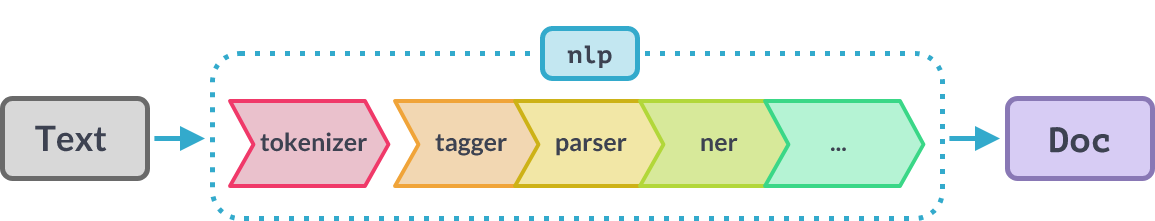

In [56]:
import spacy
from spacy import displacy

In [58]:
spacy.displacy.render(processed_hline, style='dep', jupyter=True, options={'distance': 120})

In [59]:
spacy.displacy.render(processed_hline, style='ent', jupyter=True, options={'distance': 120})

labeled all the main entity

## Capture the Entity